In [1]:
import re
import time

import pandas as pd
import numpy as np
import pylab as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

# Step 1: Read CSV

To save typos in the future, we first convert a string that is camelcase into snake_case. Use underscores to avoid spaces in between of compound words.

In [2]:
def camel_to_snake(column_name):
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', column_name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

def read(file_name):
    if not os.path.isfile(file_name):
        raise ValueError('File Not Found')
        
    ext = file_name.split('.')[-1].lower()
    if 'csv' == ext:
        df = pd.read_csv(file_name)
    elif 'xls' in ext:
        df = pd.read_excel(file_name)
    elif 'json' == ext:
        df = pd.read_json(file_name)
    else:
        raise ValueError('Only support csv, xls and json')

    return df

## Merge on projectid

Basic description: Projects data lists the demographics data of school profiles and associated socio-economic factors, and the project applications data. Outcomes data lists the outcomes(whether it is exciting or not) for each project. To be exciting, a project must meet all of the top five criteria,and meet at least one extra criteria. Donations data comprises donors information and donation details associated with each individual project. Essays data conclude all essay questions funding application materials. Resources data specifies those who requested resources. 

Data choosing criteria: Since the natural language processing is beyond the scope of the project, we will rule 'Essays' dataset out of our analysis.  

Merging purpose: Merging is the first step to explore and pre-process data. For this step, I see Projects.csv as the master dataset, and merge outcomes, donations and resources datasets on projects dataset. By browsing the head of these dataset, we found the projectid could be used as primary key to merge data as it is the unique identification number that link all these four datasets together. 

In [3]:
df_project = pd.read_csv('/home/xinyuan/projects.csv', index_col='projectid')
df_outcome = pd.read_csv('/home/xinyuan/outcomes.csv', index_col='projectid')
df_donation = pd.read_csv('/home/xinyuan/donations.csv', index_col='projectid')
df_resource = pd.read_csv('/home/xinyuan/resources.csv', index_col='projectid')

In [4]:
df_origin = df_project.join(df_outcome)
df_origin = df_origin.join(df_donation)
df_origin = df_origin.join(df_resource)
df_origin.columns = [camel_to_snake(col) for col in df_origin.columns]
df_origin.head()

,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,school_district,...,for_honoree,donation_message,resourceid,vendorid,vendor_name,project_resource_type,item_name,item_number,item_unit_price,item_quantity
projectid,,,,,,,,,,,,,,,,,,,,,
00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,60609.0,urban,Pershing Elem Network,...,f,I gave because my students are AWESOME and the...,b3af2be825736f6d530314ae70e7c16c,767.0,Lakeshore Learning Materials,Supplies,CG582 - Adjustable Apron - Red,CG582,3.99,2.0
00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,60609.0,urban,Pershing Elem Network,...,f,I gave because my students are AWESOME and the...,72f084e8c03ce9b3eff6e59de0476ef8,767.0,Lakeshore Learning Materials,Supplies,FF534 - Tissue Paper Squares,FF534,9.99,1.0
00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,60609.0,urban,Pershing Elem Network,...,f,I gave because my students are AWESOME and the...,c2ea7ecbc583410fcec74c87ff102299,767.0,Lakeshore Learning Materials,Supplies,LM941 - Kid Counters,LM941,29.99,1.0
00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,60609.0,urban,Pershing Elem Network,...,f,I gave because my students are AWESOME and the...,06d48fb6646b17eea8dd7e5fdd9a6178,767.0,Lakeshore Learning Materials,Supplies,LC987 - Newsprint Easel Paper - 16&amp;#34; x ...,LC987,7.99,6.0
00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,60609.0,urban,Pershing Elem Network,...,f,I gave because my students are AWESOME and the...,aac3650483a9c0a6614ebccc6c6ced90,767.0,Lakeshore Learning Materials,Supplies,LA743 - Glitter Pack - Set of 12,LA743,12.99,2.0


# Step 2：Explore Data

## 2.1 Basic info

In [5]:
df = df_origin
df.count()

teacher_acctid                              19044197
schoolid                                    19044197
school_ncesid                               17580019
school_latitude                             19044197
school_longitude                            19044197
school_city                                 19044197
school_state                                19044197
school_zip                                  19044182
school_metro                                16923956
school_district                             19014316
school_county                               19044141
school_charter                              19044197
school_magnet                               19044197
school_year_round                           19044197
school_nlns                                 19044197
school_kipp                                 19044197
school_charter_ready_promise                19044197
teacher_prefix                              19044186
teacher_teach_for_america                   19

## 2.2 Data discriptions

In this section, we want know the distributions of these variables, and correlations between these variables, as well as the changes and trends over time.

## 2.2.1 Distributions of different variables

From literature review, TFA teachers, charter schools, magnet schools and poverty level are terminologies that always appear in the paper of low income education. We would like to examine the distributions of these variables.

mean period:  37.28581258301327


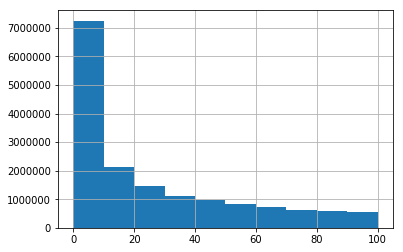

In [6]:
df['period'] = pd.to_datetime(df['donation_timestamp']) -  pd.to_datetime(df['date_posted'])
df['period'] = df['period'].apply(lambda x: x.days)
df[(df['period'] > -1) & (df['period'] < 101)]['period'].hist()
print('mean period: ', np.mean(df['period'].dropna()))

In [7]:
df.describe()

,school_ncesid,school_latitude,school_longitude,school_zip,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,great_messages_proportion,teacher_referred_count,non_teacher_referred_count,donor_zip,donation_to_project,donation_optional_support,donation_total,vendorid,item_unit_price,item_quantity,period
count,1.758002e+07,1.904420e+07,1.904420e+07,1.904418e+07,1.871015e+07,1.904420e+07,1.904420e+07,1.904118e+07,1.726390e+07,1.835153e+07,1.835153e+07,8.310948e+06,1.835249e+07,1.835249e+07,1.835249e+07,1.861637e+07,1.898874e+07,1.899834e+07,1.835249e+07
mean,2.555818e+11,3.733742e+01,-9.450415e+01,5.453665e+04,2.927995e+01,6.040844e+02,7.154270e+02,9.422115e+01,5.624667e+01,2.178887e+00,1.131106e+01,5.025699e+04,6.955396e+01,1.098474e+01,8.053700e+01,4.088562e+02,8.135608e+01,3.036285e+00,3.728581e+01
std,1.633250e+11,5.032572e+00,1.833371e+01,3.162554e+04,8.019937e+00,3.898604e+03,4.745673e+03,7.077699e+02,2.774719e+01,4.849054e+00,1.366981e+01,3.340080e+04,2.604724e+02,3.471341e+01,2.866598e+02,3.563131e+02,1.029324e+05,2.280887e+02,4.463085e+01
min,1.000050e+10,1.824914e+01,-1.766350e+02,4.100000e+02,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.275000e+01,-2.250000e+00,-1.500000e+01,1.000000e+00,-9.960000e+01,0.000000e+00,-2.230000e+03
25%,8.057900e+10,3.401798e+01,-1.170882e+02,2.789300e+04,3.000000e+01,3.365300e+02,3.973100e+02,2.200000e+01,4.000000e+01,0.000000e+00,3.000000e+00,1.942600e+04,9.840000e+00,1.500000e+00,1.000000e+01,2.100000e+01,6.290000e+00,1.000000e+00,4.000000e+00
50%,2.400330e+11,3.775066e+01,-8.792043e+01,5.511800e+04,3.000000e+01,4.480000e+02,5.312600e+02,3.000000e+01,5.700000e+01,0.000000e+00,7.000000e+00,4.631900e+04,2.125000e+01,3.750000e+00,2.500000e+01,4.300000e+02,1.385000e+01,1.000000e+00,1.800000e+01
75%,3.806780e+11,4.081389e+01,-7.985607e+01,9.000500e+04,3.500000e+01,6.572400e+02,7.776700e+02,9.700000e+01,7.500000e+01,3.000000e+00,1.400000e+01,8.901100e+04,5.000000e+01,7.500000e+00,5.381000e+01,7.670000e+02,3.600000e+01,2.000000e+00,5.900000e+01
max,6.100009e+11,6.725816e+01,-6.662804e+01,9.995000e+04,3.500000e+01,1.025002e+07,1.250002e+07,9.999990e+05,1.000000e+02,1.510000e+02,3.040000e+02,9.999900e+04,1.472040e+05,2.199600e+04,1.692000e+05,1.020000e+03,4.484216e+08,9.931080e+05,1.474000e+03


60 days of duration to get projects completed are at around 75%. So I choose 60 for the threshold as it covers majority of the population and the intervention plan will become more meaningful.

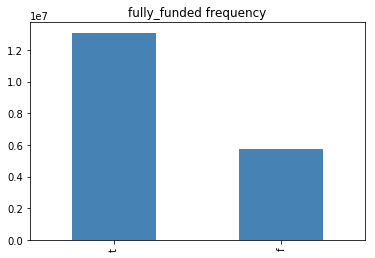

In [8]:
# if period > 60 & fully_funded == 't', then change its value to 'f'
df.loc[(df['period'] > 60) & (df['fully_funded'] == 't'), 'fully_funded'] = 'f'
del df['period']
del df['donation_timestamp']
df['fully_funded'].value_counts().plot.bar(title = "fully_funded frequency", color = "steelblue")

In [9]:
ratio = df["fully_funded"].value_counts(normalize = True)
ratio

t    0.695826
f    0.304174
Name: fully_funded, dtype: float64

In [10]:
df.groupby('resource_type')['total_price_including_optional_support'].describe()

,count,mean,std,min,25%,50%,75%,max
resource_type,,,,,,,,
Books,8334537.0,624.846463,633.497443,0.00,395.87,516.73,719.52,22351.22
Other,1417780.0,970.388412,16957.919205,0.00,387.80,523.54,774.11,12500020.73
Supplies,6778301.0,652.039987,739.360981,0.00,386.16,524.54,753.47,69670.89
Technology,2466025.0,968.252804,1924.418468,10.98,471.19,665.20,965.55,533185.37
Trips,39355.0,5577.439407,9627.791085,10.98,886.01,2090.00,5148.21,100800.01
Visitors,6936.0,1954.618749,3237.651489,20.73,632.35,990.59,2113.06,24767.07


In [11]:
df.groupby('resource_type')['fully_funded'].describe()

,count,unique,top,freq
resource_type,,,,
Books,8234435,2,t,5877107
Other,1398280,2,t,947232
Supplies,6683859,2,t,4556400
Technology,2427116,2,t,1658032
Trips,38591,2,t,30262
Visitors,6810,2,t,4732


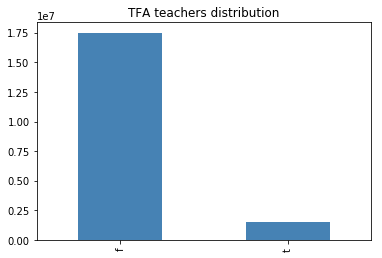

In [12]:
df['teacher_teach_for_america'].value_counts().plot.bar(title = "TFA teachers distribution", color = "steelblue")

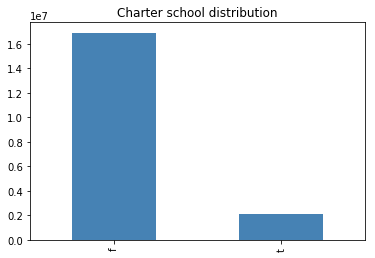

In [13]:
df['school_charter'].value_counts().plot.bar(title = "Charter school distribution", color = "steelblue")

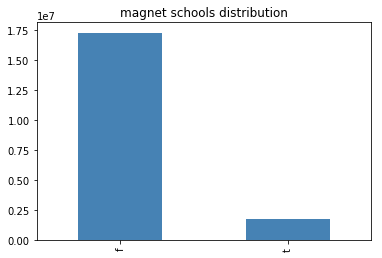

In [14]:
df['school_magnet'].value_counts().plot.bar(title = "magnet schools distribution", color = "steelblue")

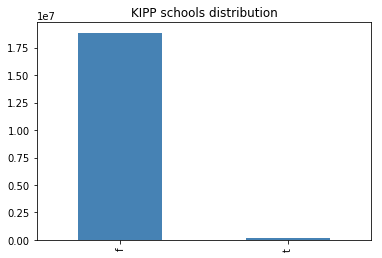

In [15]:
df['school_kipp'].value_counts().plot.bar(title = "KIPP schools distribution", color = "steelblue")

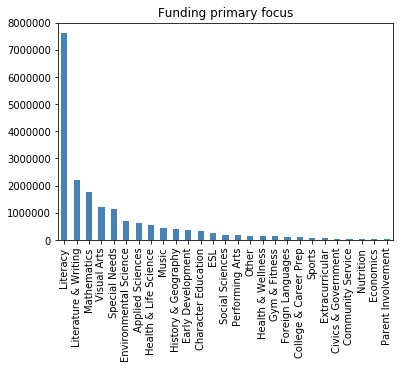

In [16]:
df['primary_focus_subject'].value_counts().plot.bar(title = "Funding primary focus", color = "steelblue")

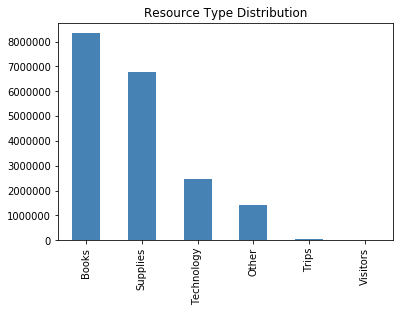

In [17]:
df['resource_type'].value_counts().plot.bar(title = "Resource Type Distribution", color = "steelblue")

In [18]:
ratio = df["resource_type"].value_counts(normalize = True)
ratio

Books         0.437671
Supplies      0.355948
Technology    0.129498
Other         0.074452
Trips         0.002067
Visitors      0.000364
Name: resource_type, dtype: float64

In [19]:
ratio = df["poverty_level"].value_counts(normalize = True)
ratio

highest poverty     0.605772
high poverty        0.242633
moderate poverty    0.127664
low poverty         0.023932
Name: poverty_level, dtype: float64

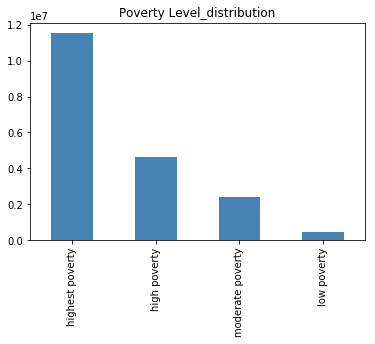

In [20]:
df['poverty_level'].value_counts().plot.bar(title = "Poverty Level_distribution", color = "steelblue")

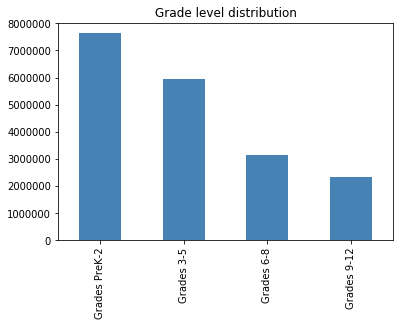

In [21]:
df['grade_level'].value_counts().plot.bar(title = "Grade level distribution", color = "steelblue")

In general, it is noticed that the data is imbalanced for true and false values. Besides, most of the projects are concentrated in Pre-K, highest-poverty regions and for the purpose of literacy. The most funded materials are books.

## 2.2.2 Changes and trends over time

In this section, we want to explore the landscape and trends of grantees(schools), donors and grantmaking.

### Sum and rate of fully funded projects over year

Not only we need to learn the landscape of grantees side, we should also capture the key features of grantmaking, and donors.

In [22]:
sum_cols = ['fully_funded']
df_by_day = df[sum_cols + ['date_posted']]
df_by_day = df_by_day.replace('t', 1).replace('f', 0)
df_by_day = df_by_day.set_index('date_posted')
df_by_day.index = pd.to_datetime(df_by_day.index)
df_by_day['year'] = df_by_day.index.year
df_by_year_sum = df_by_day.groupby('year').sum()
df_by_year_mean = df_by_day.groupby('year').mean()

<Figure size 432x288 with 0 Axes>

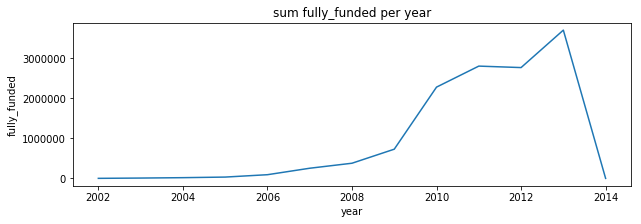

,fully_funded
year,
2002,908.0
2003,8181.0
2004,17952.0
2005,32701.0
2006,92097.0


In [23]:
def plot_hist(df, name='mean'):
    for col in df.columns:
        plt.clf()
        plt.figure(figsize=(10, 3))
        plt.plot(df.index, df[col],'')  
        plt.xlabel('year')
        plt.ylabel(col)
        plt.title('{} {} per year'.format(name, col))
        plt.show()

plot_hist(df_by_year_sum, 'sum')
df_by_year_sum.head()

<Figure size 432x288 with 0 Axes>

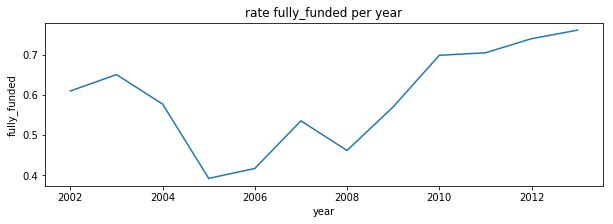

,fully_funded
year,
2002,0.609396
2003,0.650163
2004,0.576975
2005,0.392080
2006,0.416770


In [24]:
plot_hist(df_by_year_mean, 'rate')
df_by_year_mean.head()

In general, the sum of fully-funded projects increase year by year. Before 2009, the sum of fully-funded projects stablished at a relatively lower level compared to years after 2009. During the year of 2005 to 2008, there was a fluctuation for rate of fully-funded projects before it increased steadily after 2008. 

In conclusion, the years after 2007 is relatively a good duration to observe and examine funding patterns. 

### Changes and trends in grants and donors

In [25]:
mean_cols = ['donation_to_project', 'donation_optional_support', 'donation_total', 'item_quantity', 
             'total_price_including_optional_support']
df_by_day = df[mean_cols + ['date_posted']]
df_by_day = df_by_day.set_index('date_posted')
df_by_day.index = pd.to_datetime(df_by_day.index)
df_by_day['year'] = df_by_day.index.year
df_by_year = df_by_day.groupby('year').mean()
df_by_year.head()

,donation_to_project,donation_optional_support,donation_total,item_quantity,total_price_including_optional_support
year,,,,,
2002,561.368417,41.751107,603.119517,9.705750,2029.885007
2003,332.782686,46.947805,379.723427,5.484919,16771.333426
2004,262.941351,38.805454,301.746807,37.283577,774.661285
2005,214.122841,29.425803,243.550009,4.389194,752.023558
2006,180.249763,27.211696,207.465539,3.832543,902.639854


<Figure size 432x288 with 0 Axes>

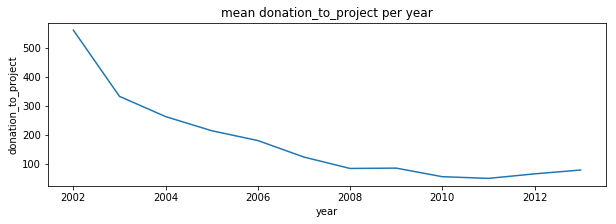

<Figure size 432x288 with 0 Axes>

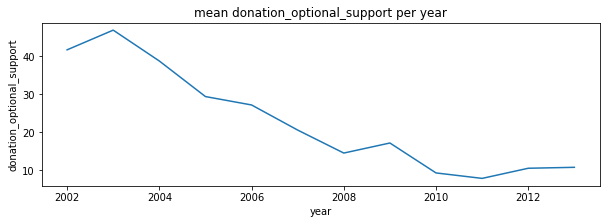

<Figure size 432x288 with 0 Axes>

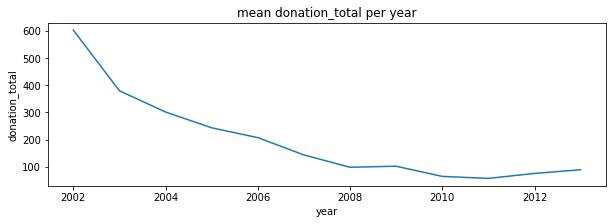

<Figure size 432x288 with 0 Axes>

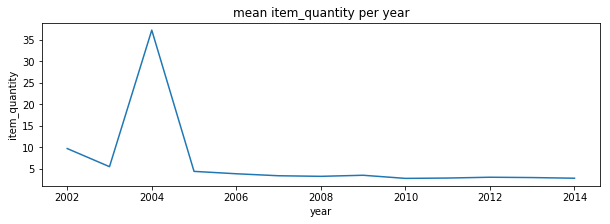

<Figure size 432x288 with 0 Axes>

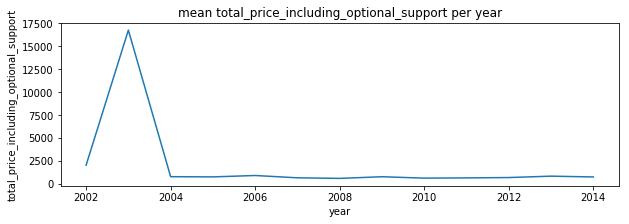

In [26]:
plot_hist(df_by_year)

In general, the amount of grants decrease since 2002. Although there is a peak during the period of 2003-2004 for the items or total amount of grants, it decrease dramatically after the period.

## 2.3 Cross-tabs

In order to further examine the relations between key factors and fully funded projects, the crosstabs would help us figure out.

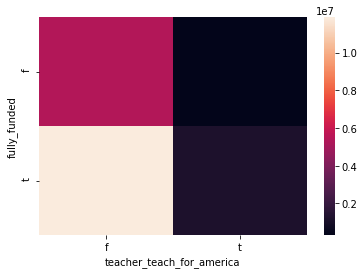

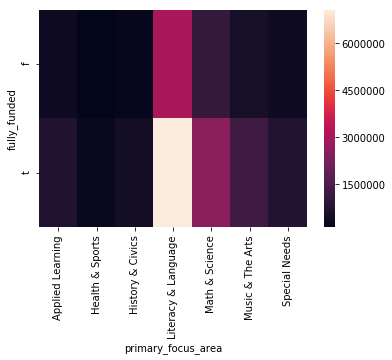

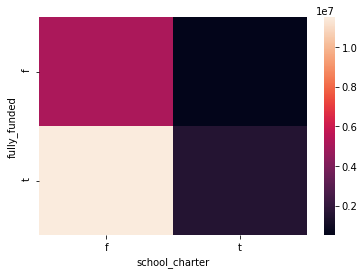

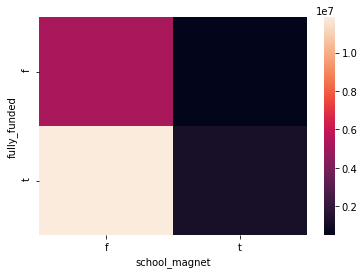

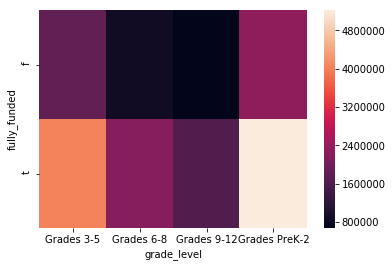

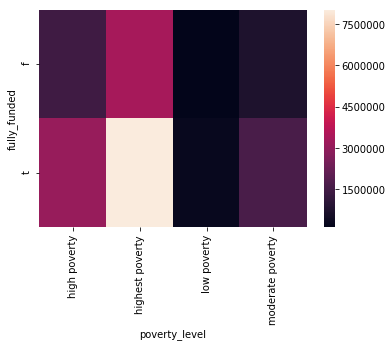

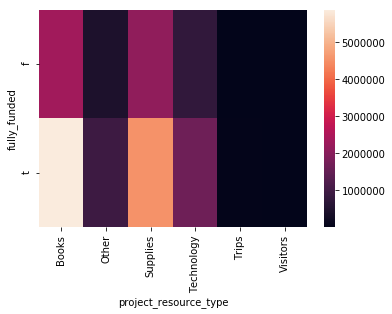

In [27]:
import seaborn as sns

def plot_crosstab(df):
    check_df = df.applymap(lambda x: isinstance(x, (int, float)))
    cols = ["teacher_teach_for_america", "primary_focus_area", "school_charter", "school_magnet", "grade_level", "poverty_level", "project_resource_type"]
    for col in cols:
        plt.clf()
        df_result = pd.crosstab(df['fully_funded'], df[col])
        sns.heatmap(df_result, xticklabels=df_result.columns, yticklabels=df_result.index)
        plt.show()
        
 
plot_crosstab(df)

The crosstab results fit what we found in the literature review. Compared to those projects that were not fully-funded, there were more Teach for America teachers in fully funded projects. Most of the highest poverty schools were fully funded. They often received books, and supplies from donors.

### *Remove id columns, address and essay question entries

In order to simplify the data explorations and reduce irrelevant correlations, we select cities, counties or states as representatives of geographic features and remove all the left. IDs of teachers, schools and donors are not the only variables to demonstrate identities, so we remove id columns to reduce training time. In addition, essay questions are out of project scope and we remove them from main data.

In [28]:
df = df.replace('f', 0).replace('t', 1)
exclude_cols = ['school_latitude', 'school_longitude', 'school_zip',
               'donation_message', 'vendor_name', 'item_name', 'item_number', 'school_metro', 'payment_method']
left_cols = [col for col in df.columns if (not col.endswith('id')) and col not in exclude_cols]
df = df[left_cols]
df.head()

,school_city,school_state,school_district,school_county,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,...,donation_included_optional_support,payment_included_acct_credit,payment_included_campaign_gift_card,payment_included_web_purchased_gift_card,payment_was_promo_matched,via_giving_page,for_honoree,project_resource_type,item_unit_price,item_quantity
projectid,,,,,,,,,,,,,,,,,,,,,
00001ccc0e81598c4bd86bacb94d7acb,Chicago,IL,Pershing Elem Network,Cook,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,Supplies,3.99,2.0
00001ccc0e81598c4bd86bacb94d7acb,Chicago,IL,Pershing Elem Network,Cook,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,Supplies,9.99,1.0
00001ccc0e81598c4bd86bacb94d7acb,Chicago,IL,Pershing Elem Network,Cook,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,Supplies,29.99,1.0
00001ccc0e81598c4bd86bacb94d7acb,Chicago,IL,Pershing Elem Network,Cook,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,Supplies,7.99,6.0
00001ccc0e81598c4bd86bacb94d7acb,Chicago,IL,Pershing Elem Network,Cook,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,Supplies,12.99,2.0


## 2.4 Correlations between variables

In order to investigate the dependence between multiple variables at the same time, we would like to plot a table with correlation coefficients between each variable and the others. The first step is to calculate the correlation matrix, and then plot the heatmap.

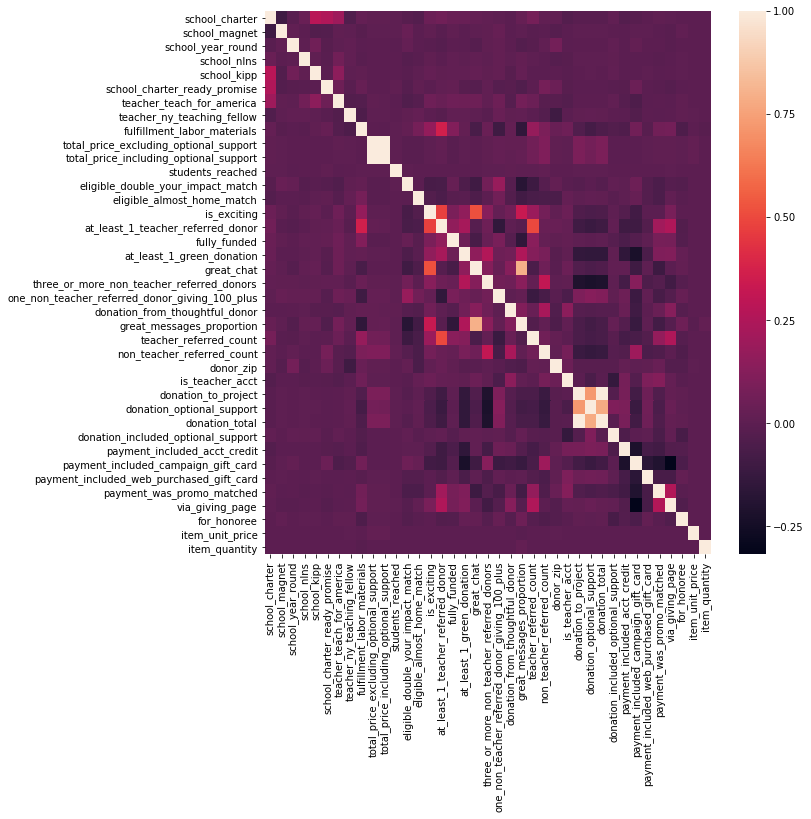

In [29]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# Step 3: Pre Process Data

## Change non-numberic columns into numeric variables

We change all of the categorical and dummy variables into numeric variables.

In [30]:
def check_not_numberic(df):
    check_df = df.applymap(lambda x: isinstance(x, (int, float)))
    return [col for col in check_df.columns if any(check_df[col] == False) and col != 'date_posted']
str_cols = check_not_numberic(df)
df[str_cols].head()

,school_city,school_state,school_district,school_county,teacher_prefix,primary_focus_subject,primary_focus_area,secondary_focus_subject,secondary_focus_area,resource_type,poverty_level,grade_level,donor_city,donor_state,dollar_amount,project_resource_type
projectid,,,,,,,,,,,,,,,,
00001ccc0e81598c4bd86bacb94d7acb,Chicago,IL,Pershing Elem Network,Cook,Mrs.,Mathematics,Math & Science,Visual Arts,Music & The Arts,Supplies,highest poverty,Grades PreK-2,Chicago,IL,under_10,Supplies
00001ccc0e81598c4bd86bacb94d7acb,Chicago,IL,Pershing Elem Network,Cook,Mrs.,Mathematics,Math & Science,Visual Arts,Music & The Arts,Supplies,highest poverty,Grades PreK-2,Chicago,IL,under_10,Supplies
00001ccc0e81598c4bd86bacb94d7acb,Chicago,IL,Pershing Elem Network,Cook,Mrs.,Mathematics,Math & Science,Visual Arts,Music & The Arts,Supplies,highest poverty,Grades PreK-2,Chicago,IL,under_10,Supplies
00001ccc0e81598c4bd86bacb94d7acb,Chicago,IL,Pershing Elem Network,Cook,Mrs.,Mathematics,Math & Science,Visual Arts,Music & The Arts,Supplies,highest poverty,Grades PreK-2,Chicago,IL,under_10,Supplies
00001ccc0e81598c4bd86bacb94d7acb,Chicago,IL,Pershing Elem Network,Cook,Mrs.,Mathematics,Math & Science,Visual Arts,Music & The Arts,Supplies,highest poverty,Grades PreK-2,Chicago,IL,under_10,Supplies


In [31]:
for col in str_cols:
    df[col] = df[col].astype('category').cat.codes

df.head()

,school_city,school_state,school_district,school_county,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,...,donation_included_optional_support,payment_included_acct_credit,payment_included_campaign_gift_card,payment_included_web_purchased_gift_card,payment_was_promo_matched,via_giving_page,for_honoree,project_resource_type,item_unit_price,item_quantity
projectid,,,,,,,,,,,,,,,,,,,,,
00001ccc0e81598c4bd86bacb94d7acb,1411,14,6319,365,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2,3.99,2.0
00001ccc0e81598c4bd86bacb94d7acb,1411,14,6319,365,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2,9.99,1.0
00001ccc0e81598c4bd86bacb94d7acb,1411,14,6319,365,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2,29.99,1.0
00001ccc0e81598c4bd86bacb94d7acb,1411,14,6319,365,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2,7.99,6.0
00001ccc0e81598c4bd86bacb94d7acb,1411,14,6319,365,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2,12.99,2.0


## Check and Fill out missing value

A standard and often very good approach is to replace missing values with mean, median and zeros. For numerical values we usually go with mean. If there are some outliers, try median first since it is less sensitive to them.

In [32]:
def check_missing(df):
    return [col for col in df.columns if any(df[col].isnull()) == True]

def fill_missing(df, col_name, method):
    if method == 'mean':
        df[col_name] = df[col_name].fillna(df[col_name].mean())
    elif method == 'median':
        df[col_name] = df[col_name].fillna(df[col_name].median())
    elif method == 'zero':
        df[col_name] = df[col_name].fillna(0)
        
missing_cols = check_missing(df)
missing_cols

['fulfillment_labor_materials',
 'students_reached',
 'is_exciting',
 'at_least_1_teacher_referred_donor',
 'fully_funded',
 'at_least_1_green_donation',
 'great_chat',
 'three_or_more_non_teacher_referred_donors',
 'one_non_teacher_referred_donor_giving_100_plus',
 'donation_from_thoughtful_donor',
 'great_messages_proportion',
 'teacher_referred_count',
 'non_teacher_referred_count',
 'donor_zip',
 'is_teacher_acct',
 'donation_to_project',
 'donation_optional_support',
 'donation_total',
 'donation_included_optional_support',
 'payment_included_acct_credit',
 'payment_included_campaign_gift_card',
 'payment_included_web_purchased_gift_card',
 'payment_was_promo_matched',
 'via_giving_page',
 'for_honoree',
 'item_unit_price',
 'item_quantity']

In [33]:
for col in missing_cols:
    fill_missing(df, col, 'mean')
check_missing(df)

[]

As we can see, there is no missing values.

## Drop out outliers

The impact of outliers could be not only seen in predictive modeling but also in statistical tests where it reduced the power of tests. Most paremetric statistics like means, standard deviations and correlations, and every statistics based on these, are highly sensitive to outliers. We care for the impact of outliers in predictivae modeling in this case.

From the statistics below, in order to get a better fit and more general solutions, we first detecting outliers, and then use '(data - mean) < 3 * std' to determine whether to drop these outliers.

In [34]:
df.describe()

,school_city,school_state,school_district,school_county,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,...,donation_included_optional_support,payment_included_acct_credit,payment_included_campaign_gift_card,payment_included_web_purchased_gift_card,payment_was_promo_matched,via_giving_page,for_honoree,project_resource_type,item_unit_price,item_quantity
count,1.904420e+07,1.904420e+07,1.904420e+07,1.904420e+07,1.904420e+07,1.904420e+07,1.904420e+07,1.904420e+07,1.904420e+07,1.904420e+07,...,1.904420e+07,1.904420e+07,1.904420e+07,1.904420e+07,1.904420e+07,1.904420e+07,1.904420e+07,1.904420e+07,1.904420e+07,1.904420e+07
mean,4.322010e+03,2.241156e+01,4.499871e+03,8.236617e+02,1.128003e-01,9.334234e-02,4.970732e-02,1.889064e-02,1.019045e-02,8.214471e-03,...,9.014473e-01,1.049581e-01,3.288865e-01,5.421979e-02,7.821675e-02,3.357568e-01,2.252823e-02,1.184745e+00,8.135608e+01,3.036285e+00
std,2.577929e+03,1.562527e+01,2.370701e+03,4.335018e+02,3.163486e-01,2.909116e-01,2.173396e-01,1.361388e-01,1.004321e-01,9.026070e-02,...,2.925975e-01,3.008817e-01,4.611977e-01,2.223004e-01,2.635909e-01,4.635986e-01,1.456739e-01,1.141124e+00,1.027824e+05,2.278139e+02
min,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-9.960000e+01,0.000000e+00
25%,1.700000e+03,6.000000e+00,2.561000e+03,4.520000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.290000e+00,1.000000e+00
50%,4.589000e+03,2.100000e+01,4.619000e+03,8.920000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.394000e+01,1.000000e+00
75%,6.584000e+03,3.500000e+01,6.163000e+03,1.130000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,3.690000e+01,2.000000e+00
max,9.006000e+03,5.100000e+01,9.245000e+03,1.701000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,4.484216e+08,9.931080e+05


In [35]:
def find_outliers(df, col):
    return df[((df[col] - df[col].mean()) / df[col].std()).abs() >= 3]

def find_all_outliers(df):
    counter = []
    for f in df.columns:
        if f != 'date_posted':
            counter.append((f, len(find_outliers(df, f))))
    counter.sort(key=lambda x: x[1], reverse=True)
    counter = counter[:2]
    return counter
        
cols = find_all_outliers(df)
cols

[('donation_included_optional_support', 1808687), ('school_magnet', 1777630)]

In [36]:
# use (data - mean) < 3 * std to determine whether to drop
def drop_outliers(df, col):
    return df[((df[col] - df[col].mean()) / df[col].std()).abs() < 3]
old_len = len(df)
for f, _ in cols:
    df = drop_outliers(df, f)

print('drop out {} outliers'.format(old_len - len(df)))

drop out 3413658 outliers


# Step 4: Generate Features

There are 54 variables in our data. Unneeded, irrelevant and redundant attributes from data that do not contribute to the accuracy of a predictive model or may in fact decrease the accuracy of the model. In order to find variables that most contribute to the prediction variable, we first plot and rank features importance. This step will help us reduce overfitting problem, improve accuracy and reduce training time.

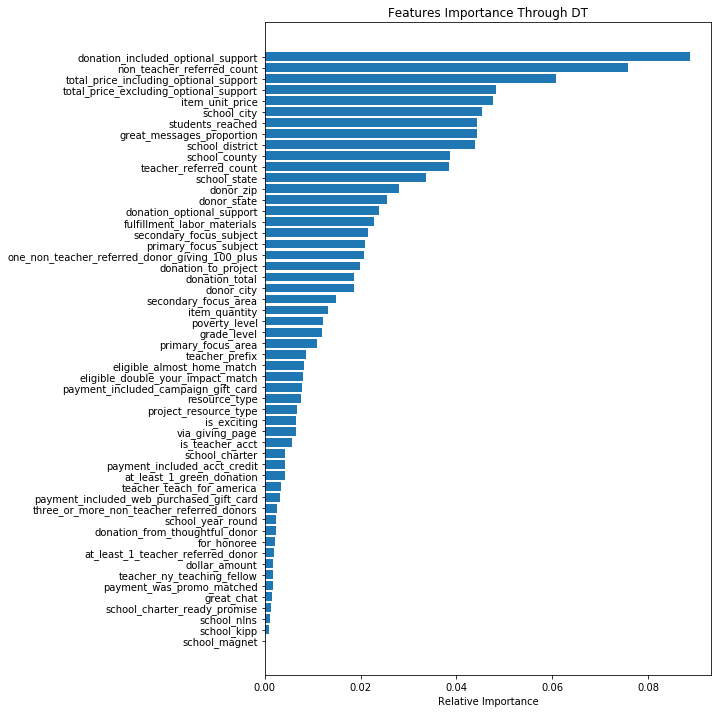

In [37]:
def sort_features_through_dt(df_features, df_label):
    features = df_features.columns
    model = DecisionTreeClassifier()
    model.fit(df_features, df_label)
    importances = model.feature_importances_
    sorted_idx = np.argsort(importances)
    padding = np.arange(len(features)) + 0.5
    plt.figure(figsize=(8, 12))
    plt.barh(padding, importances[sorted_idx], align='center')
    plt.yticks(padding, np.asarray(features)[sorted_idx])
    plt.xlabel("Relative Importance")
    plt.title("Features Importance Through DT")
    
    return list(np.asarray(features)[sorted_idx][::-1])

df['fully_funded'] = df['fully_funded'].astype('int')
df['fully_funded'] = 1 - df['fully_funded']
all_x= df.drop(['date_posted', 'fully_funded'], axis=1)
all_y = df['fully_funded']

sorted_train_features = sort_features_through_dt(all_x, all_y)

Fewer attributes is desirable because it reduces the complexity of the model, and a simpler model is simpler to understand and explain. Thus, we would like to select the top 1/3 features into the predictive model.

As a result there are 17 features in the analysis

In [38]:
count = int(len(sorted_train_features) * 0.33)
all_x = all_x[sorted_train_features[:count]]
all_x.head()

,donation_included_optional_support,non_teacher_referred_count,total_price_including_optional_support,total_price_excluding_optional_support,item_unit_price,school_city,students_reached,great_messages_proportion,school_district,school_county,teacher_referred_count,school_state,donor_zip,donor_state,donation_optional_support,fulfillment_labor_materials,secondary_focus_subject
projectid,,,,,,,,,,,,,,,,,
ed778c79be307654af5ee43da9ed3349,1.0,21.0,388.79,330.47,3.99,2769,70.0,0.0,2740,722,0.0,4,50113.518311,9,1.50,35.0,-1
445c927173df6aef2f2a84a0faad947e,1.0,15.0,693.85,568.96,7.15,3008,25.0,100.0,2957,609,0.0,38,98611.000000,56,3.60,9.0,12
1fbaf5dcb7cff46eaaf7887efbe14d32,1.0,4.0,434.68,369.48,28.49,1199,100.0,80.0,1250,1315,0.0,23,77586.000000,51,7.50,30.0,18
6084e2c13b245b75da35354f362992fb,1.0,1.0,237.13,201.56,28.49,2133,70.0,100.0,2128,1306,0.0,38,30030.000000,15,35.57,30.0,17
b5edc1145caaaa902141290efc38abd5,1.0,4.0,396.18,336.75,36.45,4981,43.0,57.0,1534,255,4.0,48,91701.000000,9,7.50,30.0,16


# Step 5: Split Train and Test Set
## construct test window

We select 2007 to 2014 as main dataframe. In general, we create the training sets for 3 years long and the test sets for the year afterwards. For example, we train 2009-2011, and test 2012. Overall, we will produce 5 train-test windows. The result for each window is also plotted behind.

In [39]:
def norm(df_features):
    # normalize
    df_features = preprocessing.MinMaxScaler().fit_transform(df_features)
    df_features = preprocessing.normalize(df_features, norm='max')
    return df_features

def build_test_window(df):
    dataset = []
    name = 'date_posted'
    label_name = 'fully_funded'
    start, end = 2007, 2012
    for year in range(start, end):
        test_year = start + 3
        df_left = df[(df[name] >= '{}-01-01'.format(start)) & (df[name] <= '{}-12-31'.format(start+2))]
        y_train = df_left[label_name]
        x_train = df_left[all_x.columns]
        
        df_right = df[(df[name] >= '{}-01-01'.format(test_year)) & (df[name] <= '{}-12-31'.format(test_year))]
        y_test = df_right[label_name]
        x_test = df_right[all_x.columns]
        
        # normalization
        x_train = norm(x_train)
        x_test = norm(x_test)
        dataset.append((x_train, y_train, x_test, y_test))
    return dataset


dataset = build_test_window(df)
print("has construct {} test window, every three years'data as one".format(len(dataset)))
dataset[0][0][:5]

has construct 5 test window, every three years'data as one


array([[1.00000000e+00, 5.49019608e-02, 7.68363233e-03, 7.68365439e-03,
        5.50362816e-04, 5.53653598e-01, 1.50009376e-03, 1.00000000e+00,
        5.52587334e-01, 4.40665702e-01, 0.00000000e+00, 7.60000000e-01,
        9.86119861e-01, 9.50000000e-01, 4.28221592e-04, 0.00000000e+00,
        4.81481481e-01],
       [1.00000000e+00, 7.84313725e-03, 6.54270790e-03, 6.54271607e-03,
        5.38431874e-03, 5.17209645e-02, 2.75017189e-03, 1.00000000e+00,
        5.80982627e-02, 1.68596237e-01, 0.00000000e+00, 3.20000000e-01,
        6.48046480e-01, 5.16666667e-01, 8.93420536e-04, 3.94499507e-01,
        9.25925926e-01],
       [1.00000000e+00, 1.96078431e-02, 4.14842177e-03, 4.14836040e-03,
        1.15306783e-03, 9.41284741e-01, 1.18757422e-03, 5.61899582e-01,
        2.47524752e-01, 2.73516643e-01, 0.00000000e+00, 5.60000000e-01,
        8.07018070e-01, 1.83333333e-01, 2.67191188e-04, 3.94499507e-01,
        0.00000000e+00],
       [1.00000000e+00, 5.09803922e-02, 7.96261375e-03, 7.962

# Step 6: Build Classifier

Derived from the project descriptions, we use Logistic Regression, K-NN, Decision Trees, SVM, Random Forest, Boosting and Bagging as classifers. For each classifier, we select several default parameters into grid search

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ParameterGrid, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (RandomForestClassifier,
                              GradientBoostingClassifier,
                              BaggingClassifier)
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (precision_recall_curve, roc_auc_score, roc_curve, auc,
                             precision_score, recall_score, f1_score)

In [41]:
classifier_constructors = {
    'LR': LogisticRegression,
    'KNN': KNeighborsClassifier,
    'DT': DecisionTreeClassifier,
    'SVM': SVC,
    'RF': RandomForestClassifier,
    'GB': GradientBoostingClassifier,
    'BG': BaggingClassifier
}

grid = dict()
grid['LR'] = {
    'penalty': ['l1', 'l2'],
    'C': [0.0001 * (10**i) for i in range(5)]
}
grid['DT'] = {
    'max_depth': [5, 10, 20],
    'criterion': ['gini', 'entropy']
}
grid['KNN'] = {
    'n_neighbors': [1, 5, 100],
    'algorithm': ['ball_tree', 'kd_tree']
}
grid['SVM'] = {
    'C': [0.1, 0.5, 1],
    'gamma': [1e-3, 1e-4],
    'kernel': ['rbf', 'linear']
}
grid['RF'] = {
    'n_estimators': [1, 5, 100],
    'max_depth': [5, 10, 20], 
    'max_features': ['sqrt', 'log2']
}
grid['GB'] = {
    'n_estimators': [1, 5, 100],
    'learning_rate' : [0.1, 0.5]
}
grid['BG'] = {
    'n_estimators': [1, 5, 100],
    "bootstrap": [True, False],
    "bootstrap_features": [True, False]
}

## Temporal validation
Since our data contains time series components, we could not use KFold cross validations. We would like to use f1-score to find the best parameters.

In [42]:
import warnings
warnings.filterwarnings('ignore')

def classify(x_train, y_train, x_test, y_test, clf):
    clf.fit(x_train, y_train)
    y_pre = clf.predict(x_test)
    return f1_score(y_test, y_pre)

In [43]:
def select_best_parameters(x_train, y_train, x_test, y_test):
    # iter three times
    number = 3
    # store all the scores and parameters
    classifiers = {}
    results = {}
    for k, clf_constructor in classifier_constructors.items():
        results[k] = []
        params = grid[k]
        for p in ParameterGrid(params):
            clf = clf_constructor(**p)
            f1_scores = [classify(x_train, y_train, x_test, y_test, clf) for i in range(number)]
            f1_score_mean = sum(f1_scores) / len(f1_scores)
            results[k].append((p, f1_score_mean))
    return results

In [44]:
all_best = {}
for x_train, y_train, x_test, y_test in dataset:
    results = select_best_parameters(x_train, y_train, x_test, y_test)
    for k, p_list in results.items():
        p = max(p_list, key=lambda x: x[1])
        if k not in all_best:
            all_best[k] = [p]
        else:
            all_best[k].append(p)

In [45]:
# PLEASE TAKE NOTE: MAKE SURE THE NUMBER IN THE []IS RIGHT, COMBINE 44 AND 45
# print last 3 window value
for k, p in all_best.items():
    print(k)
    print('train: 2009-2011, test: 2012', p[-3])
    print('train: 2010-2012, test: 2013', p[-2])
    print('train: 2011-2013, test: 2014', p[-1])

LR
train: 2009-2011, test: 2012 ({'C': 1.0, 'penalty': 'l1'}, 0.30320739984664735)
train: 2010-2012, test: 2013 ({'C': 1.0, 'penalty': 'l1'}, 0.3032514120144955)
train: 2011-2013, test: 2014 ({'C': 1.0, 'penalty': 'l1'}, 0.3032761094881715)
KNN
train: 2009-2011, test: 2012 ({'algorithm': 'ball_tree', 'n_neighbors': 1}, 0.3607002716571084)
train: 2010-2012, test: 2013 ({'algorithm': 'ball_tree', 'n_neighbors': 1}, 0.3607002716571084)
train: 2011-2013, test: 2014 ({'algorithm': 'ball_tree', 'n_neighbors': 1}, 0.3607002716571084)
DT
train: 2009-2011, test: 2012 ({'criterion': 'gini', 'max_depth': 20}, 0.4084038985521328)
train: 2010-2012, test: 2013 ({'criterion': 'gini', 'max_depth': 20}, 0.4015076622562048)
train: 2011-2013, test: 2014 ({'criterion': 'gini', 'max_depth': 20}, 0.4063284100850108)
SVM
train: 2009-2011, test: 2012 ({'C': 1, 'gamma': 0.001, 'kernel': 'linear'}, 0.1027511463109629)
train: 2010-2012, test: 2013 ({'C': 1, 'gamma': 0.001, 'kernel': 'linear'}, 0.1027511463109629

As we see, when years changes, the best parameters doesn't change almostly.
So we can use 2011-2013/2014 data to evaluate the classifier

# Step 7: Evaluate Classifier

In this section, in order to evaluate the classifers, we plot accuracy, precision at different levels, recall at different levels, F1, area under curve and precision-recall curves. Then we select best perform classifers based on different thresholds, and compare the results with baselines.

## 7.1 Calculating, Selecting and Comparing

In [46]:
# evalute metrics
def evaluate_classifier(y_test, y_pre, y_prob, cost_time=0):
    return {
        'precision': float("%.4f" % precision_score(y_test, y_pre)),
        'recall': float("%.4f" % recall_score(y_test, y_pre)),
        'f1': float("%.4f" % f1_score(y_test, y_pre)),
        'auc': float("%.4f" % roc_auc_score(y_test, y_prob)),
        'cost_time': float("%.4f" % cost_time)
    }

def evaluate_classifiers(X_test, y_test, threshold):
    metrics = dict()
    probas = dict()
    for k, clf in classifiers.items():
        start = time.time()
        if hasattr(clf, 'predict_proba'):
            y_prob = clf.predict_proba(X_test)[:, 1]
        else:
            y_prob = clf.decision_function(X_test)
        y_pre = np.asarray([1 if run >= threshold else 0 for run in y_prob])
        cost_time = time.time() - start
        metrics[k] = evaluate_classifier(y_test, y_pre, y_prob, cost_time)
        probas[k] = y_prob
    return metrics, probas
        
# we use 2011-2013 data for train, 2014 data for test
classifiers = {}
x_train, y_train, x_test, y_test = dataset[-1]

for k, p in all_best.items():
    clf = classifier_constructors[k](**p[-1][0])
    clf.fit(x_train, y_train)
    classifiers[k] = clf

metrics, probas = evaluate_classifiers(x_test, y_test, 0.001)
metrics

{'BG': {'auc': 0.5634,
  'cost_time': 0.6698,
  'f1': 0.4826,
  'precision': 0.3181,
  'recall': 1.0},
 'DT': {'auc': 0.5273,
  'cost_time': 0.0148,
  'f1': 0.441,
  'precision': 0.331,
  'recall': 0.6602},
 'GB': {'auc': 0.5532,
  'cost_time': 0.0637,
  'f1': 0.4826,
  'precision': 0.3181,
  'recall': 1.0},
 'KNN': {'auc': 0.5113,
  'cost_time': 19.1912,
  'f1': 0.3607,
  'precision': 0.331,
  'recall': 0.3963},
 'LR': {'auc': 0.5496,
  'cost_time': 0.0181,
  'f1': 0.4826,
  'precision': 0.3181,
  'recall': 1.0},
 'RF': {'auc': 0.5672,
  'cost_time': 0.5251,
  'f1': 0.4826,
  'precision': 0.3181,
  'recall': 1.0},
 'SVM': {'auc': 0.5677,
  'cost_time': 12.7923,
  'f1': 0.1028,
  'precision': 0.8964,
  'recall': 0.0545}}

In [47]:
classifiers = {}
x_train, y_train, x_test, y_test = dataset[-1]

for k, p in all_best.items():
    clf = classifier_constructors[k](**p[-1][0])
    clf.fit(x_train, y_train)
    classifiers[k] = clf

metrics, probas = evaluate_classifiers(x_test, y_test, 0.01)
metrics

{'BG': {'auc': 0.5603,
  'cost_time': 0.7236,
  'f1': 0.4826,
  'precision': 0.3181,
  'recall': 1.0},
 'DT': {'auc': 0.524,
  'cost_time': 0.0184,
  'f1': 0.4317,
  'precision': 0.3297,
  'recall': 0.6252},
 'GB': {'auc': 0.5519,
  'cost_time': 0.0904,
  'f1': 0.4825,
  'precision': 0.318,
  'recall': 0.9992},
 'KNN': {'auc': 0.5113,
  'cost_time': 18.9314,
  'f1': 0.3607,
  'precision': 0.331,
  'recall': 0.3963},
 'LR': {'auc': 0.5497,
  'cost_time': 0.0112,
  'f1': 0.4826,
  'precision': 0.3181,
  'recall': 1.0},
 'RF': {'auc': 0.5529,
  'cost_time': 0.6093,
  'f1': 0.4826,
  'precision': 0.3181,
  'recall': 1.0},
 'SVM': {'auc': 0.5677,
  'cost_time': 12.9179,
  'f1': 0.1028,
  'precision': 0.8964,
  'recall': 0.0545}}

In [48]:
classifiers = {}
x_train, y_train, x_test, y_test = dataset[-1]

for k, p in all_best.items():
    clf = classifier_constructors[k](**p[-1][0])
    clf.fit(x_train, y_train)
    classifiers[k] = clf

metrics, probas = evaluate_classifiers(x_test, y_test, 0.1)
metrics

{'BG': {'auc': 0.5612,
  'cost_time': 0.8414,
  'f1': 0.4826,
  'precision': 0.3181,
  'recall': 1.0},
 'DT': {'auc': 0.5012,
  'cost_time': 0.016,
  'f1': 0.416,
  'precision': 0.3173,
  'recall': 0.6039},
 'GB': {'auc': 0.5587,
  'cost_time': 0.0574,
  'f1': 0.4806,
  'precision': 0.3184,
  'recall': 0.9801},
 'KNN': {'auc': 0.5113,
  'cost_time': 19.6411,
  'f1': 0.3607,
  'precision': 0.331,
  'recall': 0.3963},
 'LR': {'auc': 0.5497,
  'cost_time': 0.0233,
  'f1': 0.4826,
  'precision': 0.3181,
  'recall': 1.0},
 'RF': {'auc': 0.5723,
  'cost_time': 0.6998,
  'f1': 0.4826,
  'precision': 0.3181,
  'recall': 1.0},
 'SVM': {'auc': 0.5677,
  'cost_time': 12.5872,
  'f1': 0.0416,
  'precision': 0.7942,
  'recall': 0.0213}}

## 7.2 Draw AUC

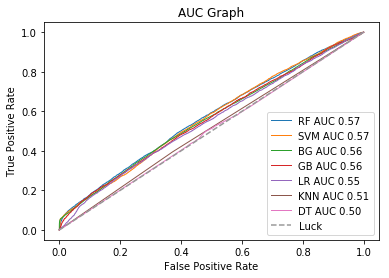

In [49]:
def draw_auc(probas, y_test):
    plt.clf()
    auc_list = []
    for k, prob in probas.items():
        fpr, tpr, thresholds = roc_curve(y_test, prob)
        roc_auc = auc(fpr, tpr)
        auc_list.append((k, roc_auc))
        
    auc_list.sort(key=lambda x: x[1], reverse=True)
    
    for k, roc_auc in auc_list:
        fpr, tpr, thresholds = roc_curve(y_test, probas[k])
        plt.plot(fpr, tpr, lw=1, label=('%s AUC %.2f' % (k, roc_auc)))
    
    
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC Graph')
    plt.legend(loc="lower right")

draw_auc(probas, y_test)

## 7.3 Draw Precision-Recall Curves

<Figure size 432x288 with 0 Axes>

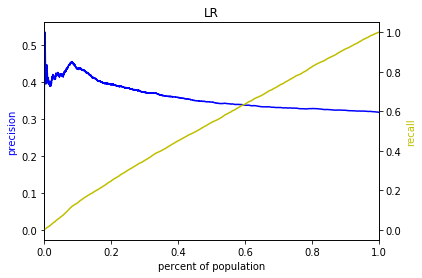

<Figure size 432x288 with 0 Axes>

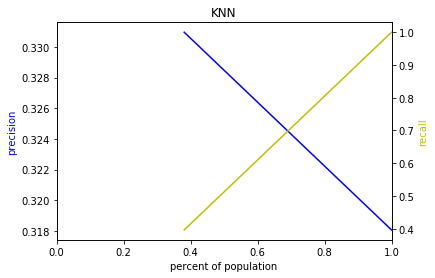

<Figure size 432x288 with 0 Axes>

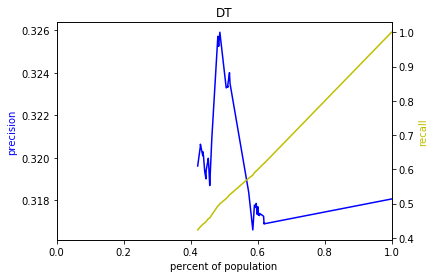

<Figure size 432x288 with 0 Axes>

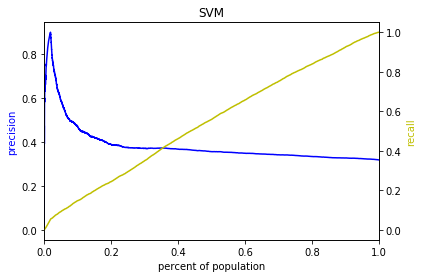

<Figure size 432x288 with 0 Axes>

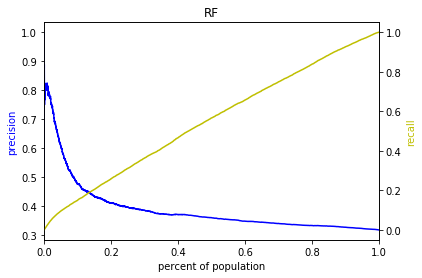

<Figure size 432x288 with 0 Axes>

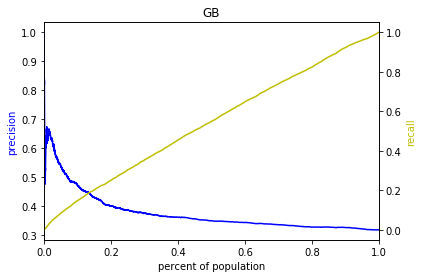

<Figure size 432x288 with 0 Axes>

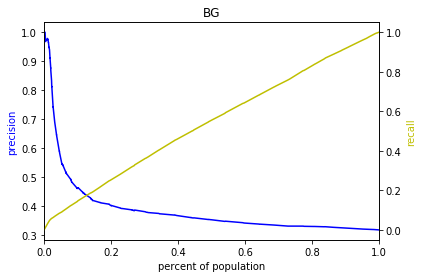

In [50]:
def plot_precision_recall(y_test, key):
    plt.clf()
    y_prob = probas[key]
    precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_test, y_prob)
    precision_curve = precision_curve[:-1]
    recall_curve = recall_curve[:-1]
    pct_per_thresh = []
    number_scored = len(y_prob)
    for value in pr_thresholds:
        num_above_thresh = len(y_prob[y_prob >= value])
        pct_above_thresh = num_above_thresh / float(number_scored)
        pct_per_thresh.append(pct_above_thresh)
    pct_per_thresh = np.array(pct_per_thresh)
    plt.clf()
    fig, ax1 = plt.subplots()
    ax1.plot(pct_per_thresh, precision_curve, 'b')
    ax1.set_xlabel('percent of population')
    ax1.set_ylabel('precision', color='b')
    ax1.set_xlim(0, max(pct_per_thresh))
    ax2 = ax1.twinx()
    ax2.plot(pct_per_thresh, recall_curve, 'y')
    ax2.set_ylabel('recall', color='y')
    ax2.set_xlim(0, max(pct_per_thresh))
    plt.title(key)
    plt.show()
    
for key in probas.keys():
    plot_precision_recall(y_test, key)

## 7.4 Draw Precision, Recall, Auc and F1

In [51]:
data = dict()
data['key'] =  ['precision', 'recall', 'f1', 'auc', 'cost_time']

for k, metric in metrics.items():
    data[k] = [metric[item] for item in data['key']]

df_result = pd.DataFrame(data)

df_result = df_result.set_index('key')
df_result.head()

,BG,DT,GB,KNN,LR,RF,SVM
key,,,,,,,
precision,0.3181,0.3173,0.3184,0.3310,0.3181,0.3181,0.7942
recall,1.0000,0.6039,0.9801,0.3963,1.0000,1.0000,0.0213
f1,0.4826,0.4160,0.4806,0.3607,0.4826,0.4826,0.0416
auc,0.5612,0.5012,0.5587,0.5113,0.5497,0.5723,0.5677
cost_time,0.8414,0.0160,0.0574,19.6411,0.0233,0.6998,12.5872


As we can see, this table shows the summary of precision, recall, f1, auc, cost time of these 7 classifers.

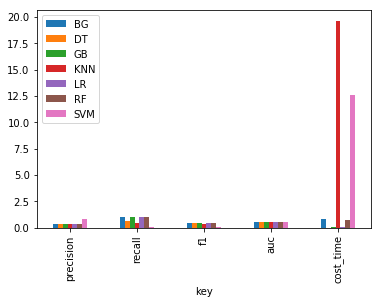

In [52]:
df_result.plot.bar();
plt.show()

This is the graph for the table above. We can see all of the 7 classifiers maintained high level of the precision, recall, f1, and auc. However, as we compared the cost time for classifiers, the KNN and SVM model consumes much more time than the 5 classifers.

# 7.5 Select the best classifier

In [53]:
# find the best one
def find_the_best_model(target='auc'):
    metrics_list = list(metrics.items())
    metrics_list.sort(key=lambda x: x[1][target], reverse=True)
    return metrics_list[0]

best = find_the_best_model('precision')
best

('SVM',
 {'auc': 0.5677,
  'cost_time': 12.5872,
  'f1': 0.0416,
  'precision': 0.7942,
  'recall': 0.0213})

We cares about precison. In general, SVM classifer competes against other 6 classifers at top 0.001, 0.01 and 0.1 percent of population.

In [54]:
def get_baseline_metric():
    base_clf = DummyClassifier()
    base_clf.fit(x_train, y_train)
    start = time.time()
    y_pre = base_clf.predict(x_test)
    cost_time = time.time() - start
    y_prob = base_clf.predict_proba(x_test)[:, 1]
    return evaluate_classifier(y_test, y_pre, y_prob, cost_time)

baseline_metric = get_baseline_metric()
('Baseline', baseline_metric)

('Baseline',
 {'auc': 0.5001,
  'cost_time': 0.0103,
  'f1': 0.3792,
  'precision': 0.3166,
  'recall': 0.4728})

## Compare to Baseline

In [55]:
thresholds = [0.001, 0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.5]
threshold_metrics = {}
for threshold in thresholds:
    threshold_metrics[str(threshold)] = evaluate_classifiers(x_test, y_test, threshold)[0]  

In [56]:
data = dict()
data['key'] =  ['best-%s' % item for item in thresholds] + ['baseline']

for k in ['recall', 'f1', 'auc', 'precision', 'cost_time']:
    data[k] = [threshold_metrics[str(threshold)][best[0]][k] for threshold in thresholds]
    data[k].append(baseline_metric[k])

    
df_result = pd.DataFrame(data)
df_result = df_result.set_index('key')
df_result = df_result.sort_values(by='precision')[::-1]
df_result.head(10)

,auc,cost_time,f1,precision,recall
key,,,,,
best-0.01,0.5677,12.4829,0.1028,0.8964,0.0545
best-0.001,0.5677,12.4427,0.1028,0.8964,0.0545
best-0.02,0.5677,12.4772,0.1020,0.8956,0.0541
best-0.05,0.5677,12.6352,0.0950,0.8919,0.0502
best-0.1,0.5677,12.7760,0.0416,0.7942,0.0213
best-0.2,0.5677,13.1796,0.0205,0.6861,0.0104
best-0.3,0.5677,12.4346,0.0155,0.6827,0.0078
best-0.5,0.5677,13.4307,0.0094,0.6719,0.0048
baseline,0.5001,0.0103,0.3792,0.3166,0.4728


As we see, when threshold equals 0.001, the SVM classifier perform best, as it has highest precision and least cost time.